In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report


In [25]:
def load_data(file_path):
    return pd.read_csv(file_path)

data = load_data("BankChurners.csv")

In [26]:
def preprocess_data(df, target_column='churn'):
    df = df.drop(columns=[col for col in df.columns if df[col].dtype == 'object' and col != target_column], errors='ignore')

    df = pd.get_dummies(df, drop_first=True)

    X = df.drop(target_column, axis=1)
    y = df[target_column]

    return X, y

X, y = preprocess_data(data)

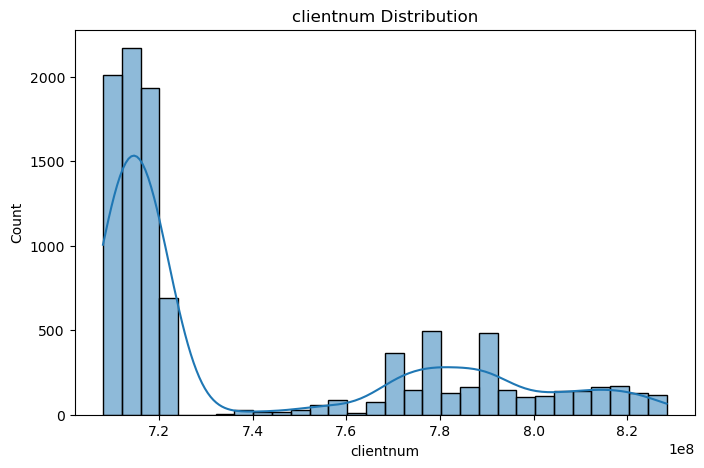

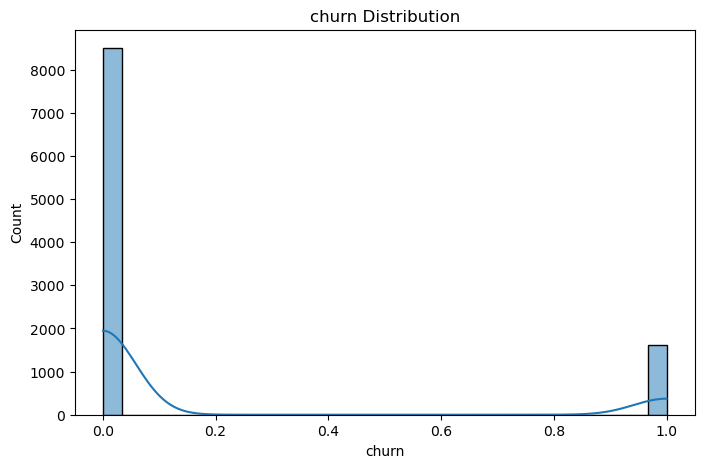

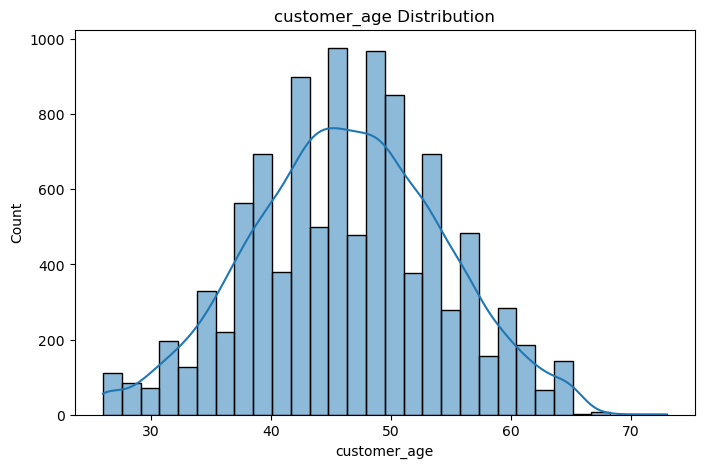

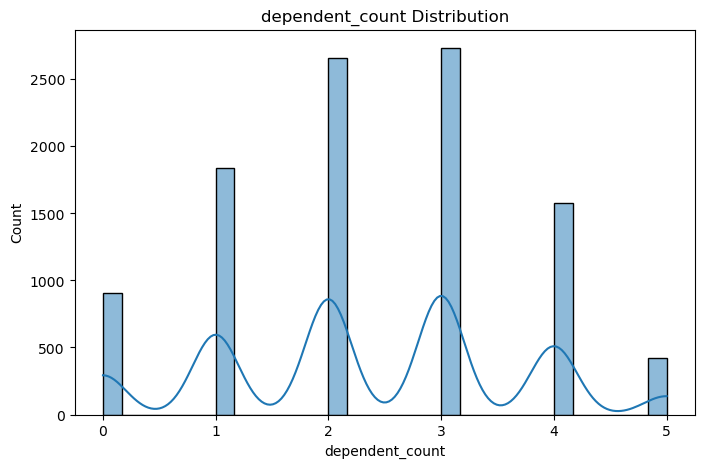

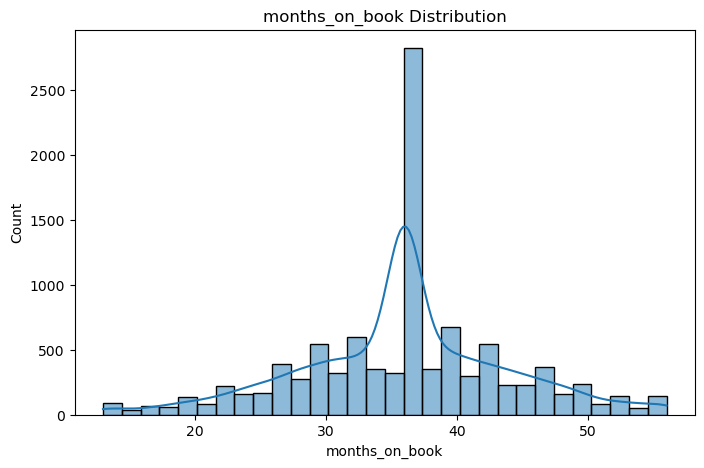

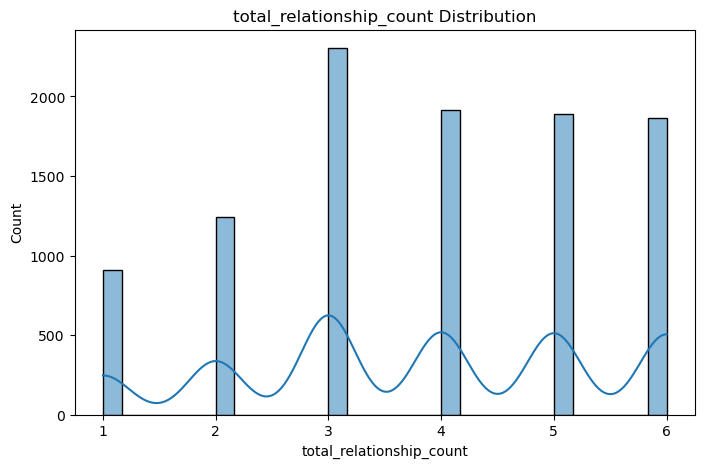

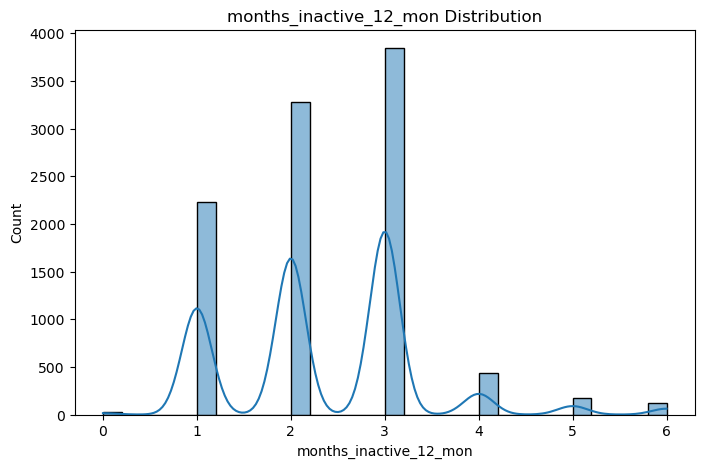

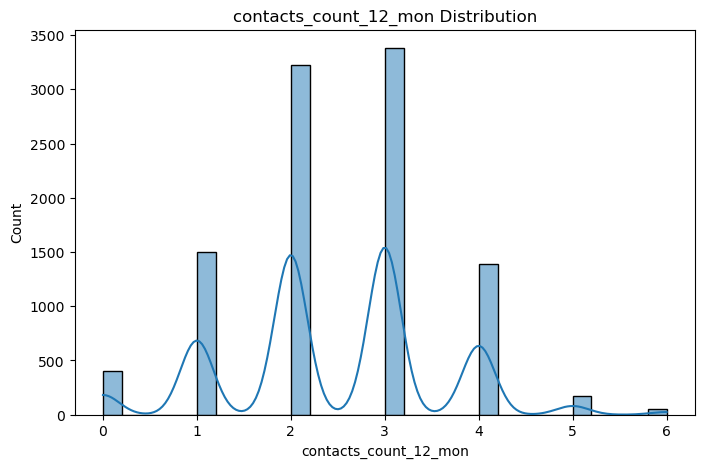

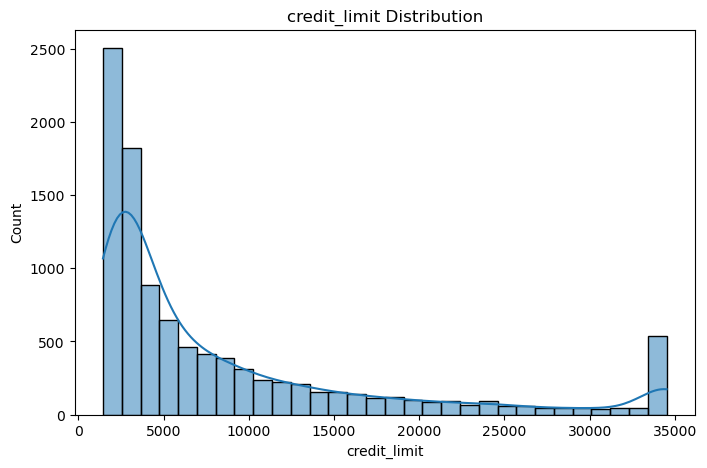

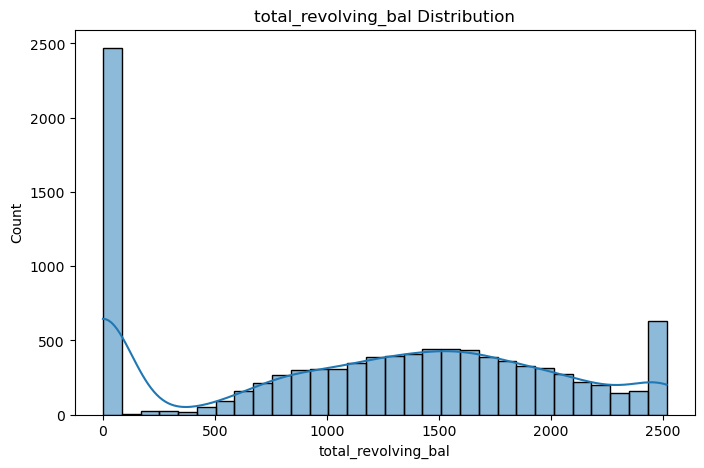

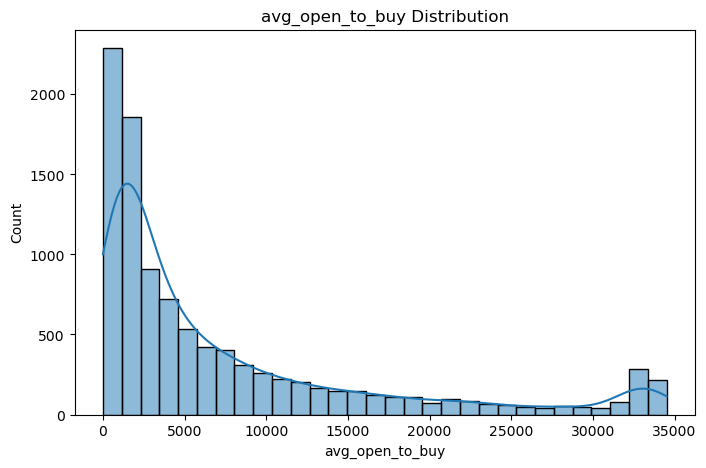

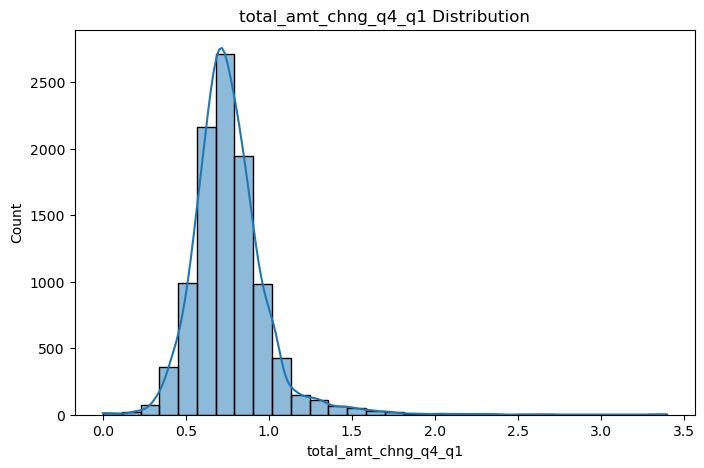

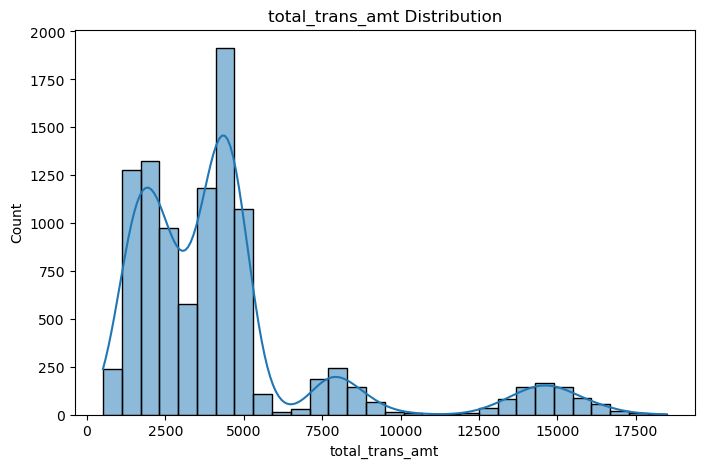

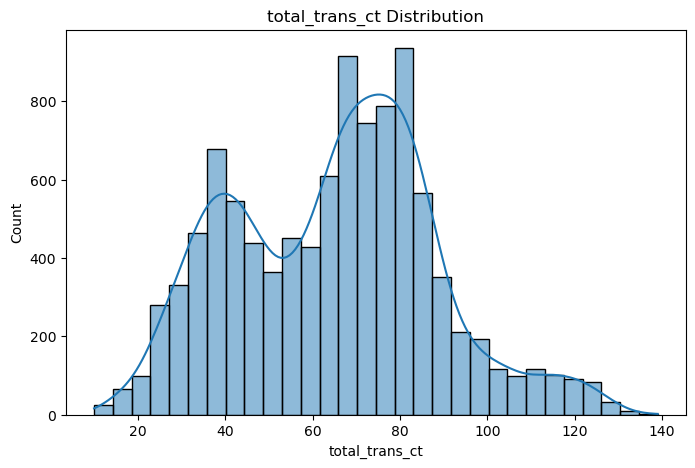

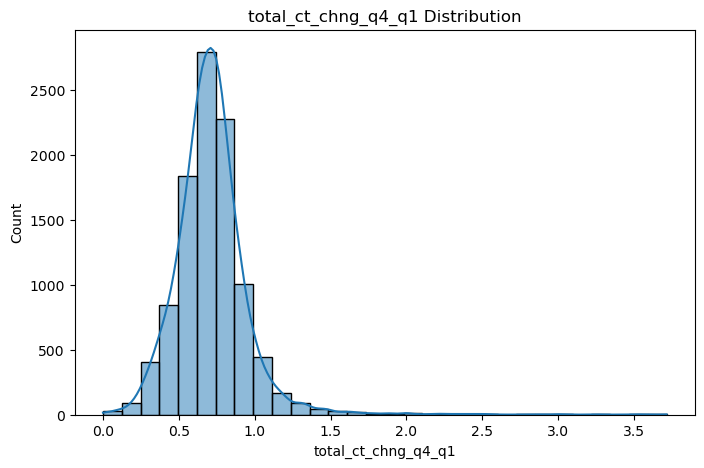

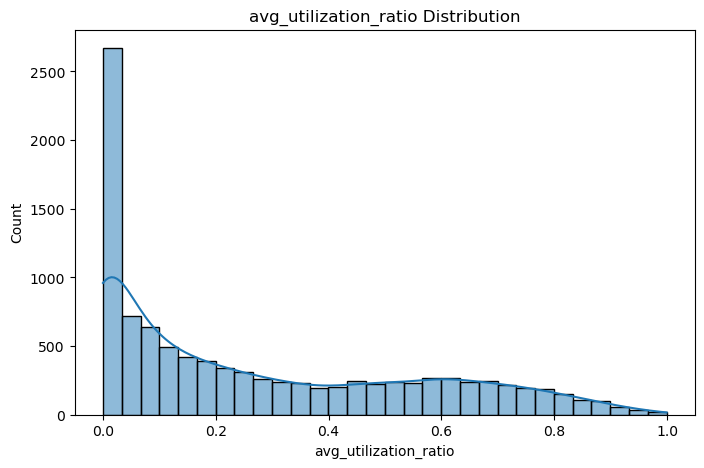

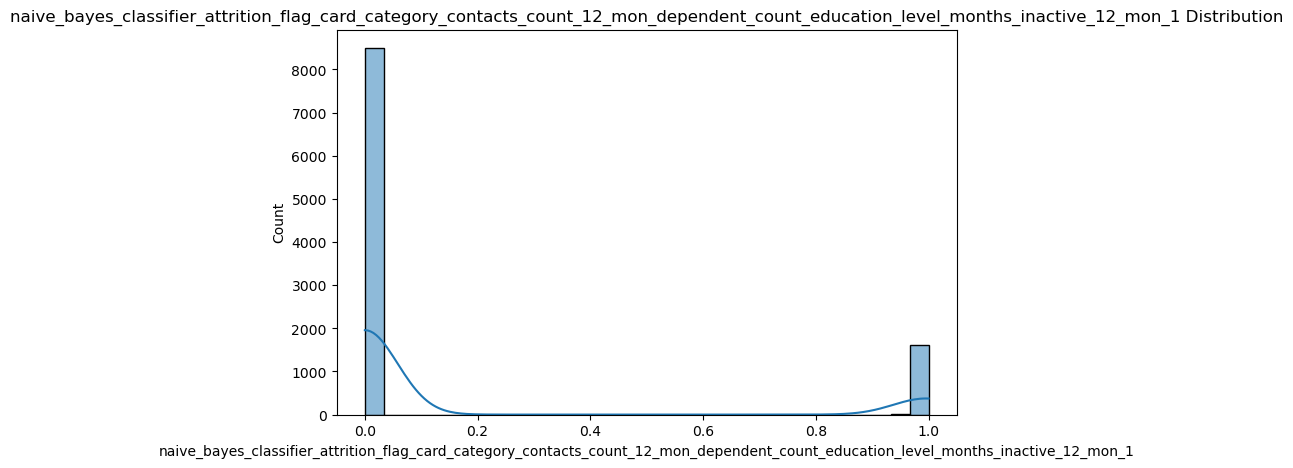

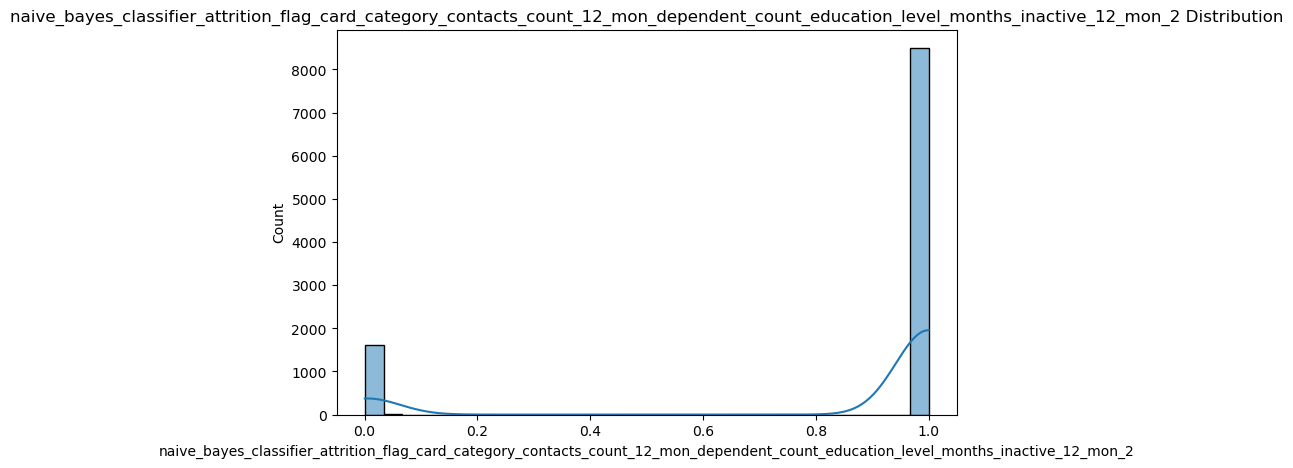

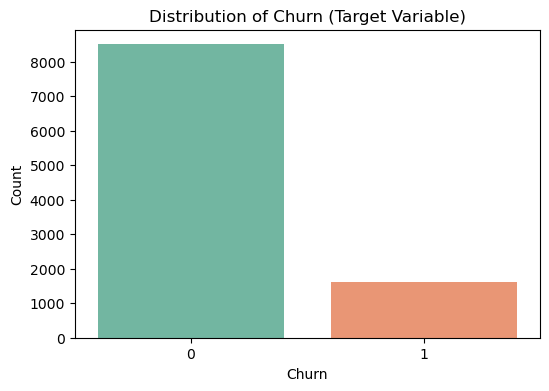

In [27]:
# Exploratory Data Analysis (EDA)
def perform_eda(df):
    # numerical features
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    for feature in numerical_features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x='churn', data=df, palette='Set2')
    plt.title('Distribution of Churn (Target Variable)')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.show()

perform_eda(data)

In [28]:
# Feature Engineering
def engineer_features(df):
    df['age_group'] = pd.cut(df['age'], bins=[18, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'], right=False)
    df['balance_salary_ratio'] = np.where(df['estimatedsalary'] != 0, df['balance'] / df['estimatedsalary'], 0)
    
    # Scaling
    scaler = StandardScaler()
    numerical_features = ['creditscore', 'age', 'balance', 'estimatedsalary']
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    # Capping outliers
    df['balance'] = np.clip(df['balance'], 0, 250000)
    df['creditscore'] = np.clip(df['creditscore'], 350, 850)

    # Interaction Terms
    df['age_product_interaction'] = df['age'] * df['numofproducts']
    
    # Encoding categorical variables
    df = pd.get_dummies(df, columns=['age_group'], drop_first=True)
    
    return df

# Engineer features
X = engineer_features(X)


KeyError: 'age'

In [29]:
# Cell 6: Model Training
def train_models(X_train, y_train):
    log_reg = LogisticRegression(max_iter=1000)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    xgb = XGBClassifier(eval_metric='logloss')

    log_reg.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    xgb.fit(X_train, y_train)

    return log_reg, rf, xgb

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
log_reg, rf, xgb = train_models(X_train, y_train)


In [30]:
# Model Training
def train_models(X_train, y_train):
    log_reg = LogisticRegression(max_iter=1000)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    xgb = XGBClassifier(eval_metric='logloss')

    log_reg.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    xgb.fit(X_train, y_train)

    return log_reg, rf, xgb

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
log_reg, rf, xgb = train_models(X_train, y_train)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:14

Model: Logistic Regression
Accuracy: 0.8368
Precision: 0.0000
Recall: 0.0000
AUC-ROC: 0.5000
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2543
           1       0.00      0.00      0.00       496

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.76      3039

------------------------------------------------------------
Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC-ROC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2543
           1       1.00      1.00      1.00       496

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039

------------------------------------------------------------
Model: XGBoost
Accuracy: 0.9997
Precision: 0

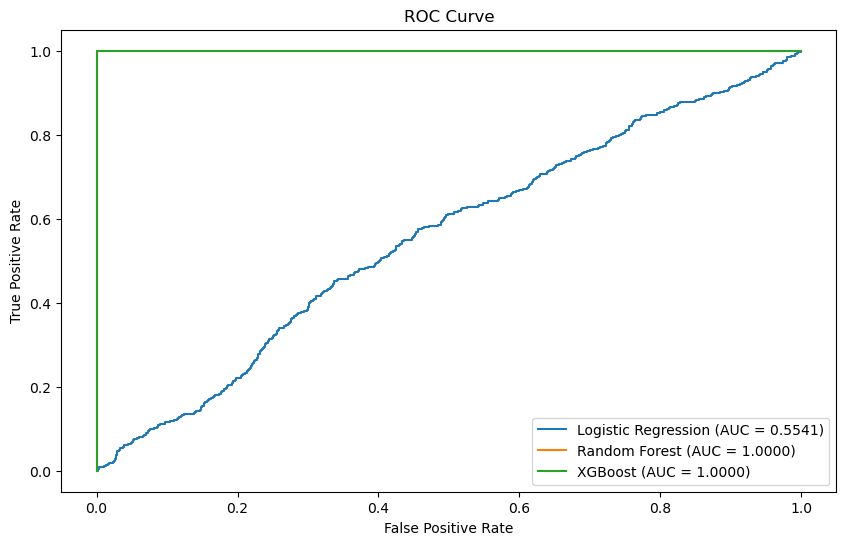

In [31]:
# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(classification_report(y_true, y_pred))
    print("-" * 60)

def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_prob):.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Evaluate models
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Plot ROC curves
plt.figure(figsize=(10, 6))
plot_roc_curve(log_reg, X_test, y_test, 'Logistic Regression')
plot_roc_curve(rf, X_test, y_test, 'Random Forest')
plot_roc_curve(xgb, X_test, y_test, 'XGBoost')
plt.show()
